
# Sensors and Signal Analysis 2025
Author: Nuno Azevedo Silva

### Hands-on activity 2

This notebook supports the second Hands-on activity where the students will determine the transfer function and calibrate a real-world sensor. 

For this we will utilize:

---

1. **Ultrasonic Distance Sensor**:

<img src="figs/distance.png" width="600"/>

An ultrasonic distance sensor works by emitting a high-frequency sound wave and measuring the time it takes for the echo to bounce back from an object. Using a microcontroller you send the sound pulse by sending a eletric pulse to the trigger, which then waits for an echo to determine the time delay $\Delta t$. The distance can be easily calculated as 

 $\delta =\frac{\Delta t}{2}  \times c_s$ 
 
where $c_s \approx 343 m/s $ is the speed of sound.

---

2. **Resistance-based Water level sensor**: 

<img src="figs/Water-Level-Sensor-Calibration.png" width="600"/> 

A resistance-based water level sensor uses multiple power and sense traces to form a variable resistor (much like a potentiometer). This resistance varies based on how much they are immersed in water(The more water the sensor is immersed in, the better the conductivity and the lower the resistance).

---


These will be connected to either an Arduino (Distance sensor) or an ESP 32 (water level sensor), two microprocessors that have been pre-programmed accordingly (codes given in microcontroller folder).




## Auxiliary functions to read data

In [62]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt

def read_data(ser, number_reads):
    #return an array with a given number of reads for an arduino sensor listening serial port ser
    data=[]
    nreads = 0
    while nreads < number_reads:
        # Read a line of input from the Arduino
        if ser.in_waiting:
            line = ser.readline().decode('utf-8',errors='ignore').strip()
            if line:
                try:
                    # Convert the line to a float and print the distance
                    sensorread = float(line)
                    data.append(sensorread)
                    print(f"Read Value: {sensorread:.2f}", end='\r')
                    nreads+=1
                except ValueError:
                    # In case of non-numeric data, print an error message
                    print("Received invalid data:", line)
    
    return np.array(data)



# 1. Acquire the data

In [63]:
#list to store the stimuli and sensor data for each stimulus
stimulus_list = []
sensor_data = []

Text(0, 0.5, 'Sensor output ($\\mu s$)')

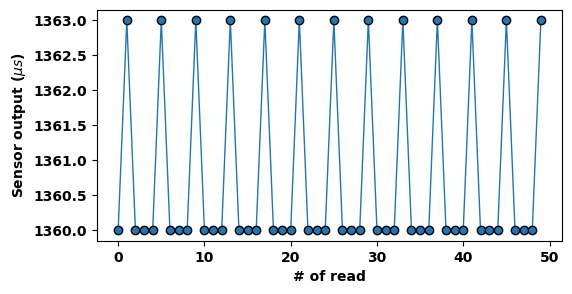

In [79]:
# modify to include data
stimulus = 55

#number of sensor reads to store
number_reads = 50

#initialize the communication with Arduino (COM3 is the port, may need to change)
ser = serial.Serial('COM5', 9600, timeout=1)
time.sleep(2)  # Give the connection a moment to initialize

data = read_data(ser, number_reads)

ser.close()

#make an histogram to accept or not the data
fig,ax = plt.subplots(figsize=[6,3])
ax.plot(data, lw=1,marker='o',markeredgecolor='k')
ax.set_xlabel("# of read")
ax.set_ylabel('Sensor output ($\mu s$)') #or arb.un. for water sensor
#accept data Y / reject data N

In [80]:
stimulus_list.append(stimulus)
sensor_data.append(data)

In [81]:
np.array(sensor_data).shape

(4, 50)

In [82]:
np.array(stimulus_list)

array([ 0, 39, 55, 55])

In [83]:
stimulus = np.savetxt('data//stimulusA.txt',np.array(stimulus_list))
data_sensorA = np.savetxt('data//data_sensorA.txt',np.array(sensor_data))

# 2. Data Analysis

Using what you have previously explored in the Jupyter notebook activity try to calibrate your sensor.
1. Start by analyzing what should be your estimator;
2. Decide on the method to compute the uncertainty;
3. Compute the transfer function and characterize your sensor;

In [84]:
stimulus = np.loadtxt('data//stimulusA.txt')
data_sensorA = np.loadtxt('data//data_sensorA.txt')